# **Handwritten text recognition using convolution neural network**

In this project we will build a deep neural network that will recognise the handwritten text. we are going to use mnist dataset which has 60000 handwritten text samples. we will train our model and check accuracy and if accuracy is not upto the mark then we will modifie our CNN model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


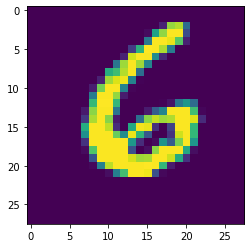

In [ ]:
plt.imshow(trainsetX[90])
plt.show()

In [ ]:
print(trainsety[90])

6


In [ ]:
print(trainsetX[90])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25
  214 225  90   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 145 212
  253 253  60   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 253 253
  246 188  23   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  45 164 254 253 223
  108   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24 236 253 252 124  28
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100 217 253 218 116   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 158 175 225 253  92   

In [ ]:
import tensorflow as tf

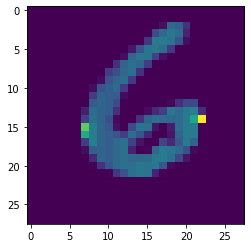

In [ ]:
x_train=tf.keras.utils.normalize(trainsetX,axis=1)
x_test=tf.keras.utils.normalize(testsetX,axis=1)
plt.imshow(x_train[90])

In [ ]:
print(x_train[90])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.03983807
  0.32824827 0.30708319 0.14702016 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

In [ ]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(32))
model.add(Activation("relu"))

In [ ]:
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                692288    
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)              

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,trainsety,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 37s 28ms/step - loss: 1.4346 - accuracy: 0.5740 - val_loss: 1.0527 - val_accuracy: 0.5904
Epoch 2/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.8852 - accuracy: 0.5981 - val_loss: 0.8242 - val_accuracy: 0.5929
Epoch 3/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.7428 - accuracy: 0.6006 - val_loss: 0.7476 - val_accuracy: 0.5963
Epoch 4/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.6913 - accuracy: 0.6029 - val_loss: 0.7248 - val_accuracy: 0.5955
Epoch 5/5
1313/1313 [==============================] - 35s 27ms/step - loss: 0.6658 - accuracy: 0.6082 - val_loss: 0.7223 - val_accuracy: 0.5856


In [ ]:
prediction=model.predict([x_testr])
print(prediction)

[[0.491273   0.49196598 0.50429505 ... 0.4963601  0.49762803 0.50195855]
 [0.49851185 0.49456477 0.49527088 ... 0.49643508 0.50482535 0.4955533 ]
 [0.500017   0.49208394 0.4988173  ... 0.49353945 0.50641716 0.4973361 ]
 ...
 [0.4887595  0.49309307 0.5026191  ... 0.49656564 0.5049318  0.50037855]
 [0.4916358  0.50614774 0.50893223 ... 0.5048185  0.49705616 0.49044442]
 [0.4956183  0.50403947 0.50386375 ... 0.4978399  0.5028475  0.49690187]]


In [ ]:
print(np.argmax(prediction[50]))

5


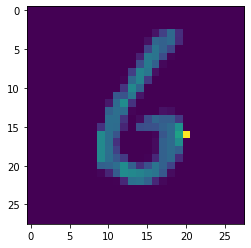

In [ ]:
plt.imshow(x_test[50])

2


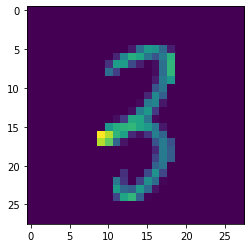

In [ ]:
print(np.argmax(prediction[515]))
plt.imshow(x_test[515])

In [ ]:
model1 =Sequential()
model1.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model1 =Sequential()
model1.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model1 =Sequential()
model1.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation("relu"))

In [ ]:
model1.add(Dense(32))
model1.add(Activation("relu"))

In [ ]:
model1.add(Dense(10))
model1.add(Activation("softmax"))

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model1.fit(x_trainr,trainsety,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0885 - val_accuracy: 0.9781
Epoch 2/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.1020 - val_accuracy: 0.9769
Epoch 3/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0855 - val_accuracy: 0.9798
Epoch 4/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.1017 - val_accuracy: 0.9760
Epoch 5/10
1313/1313 [==============================] - 35s 26ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.1036 - val_accuracy: 0.9779
Epoch 6/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.1134 - val_accuracy: 0.9785
Epoch 7/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.1166 -

In [ ]:
prediction=model1.predict([x_testr])
print(prediction)

[[7.1246681e-08 1.2737376e-05 7.8402309e-06 ... 9.9808061e-01
  1.3183347e-06 1.8131324e-03]
 [6.3535694e-08 4.6612404e-06 9.9999511e-01 ... 1.6321870e-07
  1.2218471e-08 1.9363096e-09]
 [2.8793490e-10 9.9999022e-01 7.3312529e-09 ... 1.5550295e-06
  1.6120684e-07 4.9532048e-07]
 ...
 [1.6727302e-09 1.0978924e-06 1.1477867e-06 ... 1.5998703e-05
  1.2762086e-04 1.5104441e-03]
 [6.2003683e-12 1.9589562e-12 3.2838565e-13 ... 1.2854827e-11
  5.5451233e-07 5.8656063e-10]
 [2.3387904e-04 3.6853632e-07 3.1421810e-06 ... 5.5246634e-08
  3.3101325e-05 1.2888120e-06]]


In [ ]:
print(np.argmax(prediction[200]))

3


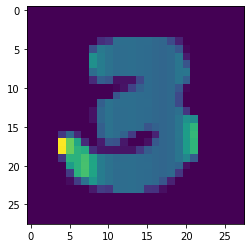

In [ ]:
plt.imshow(x_test[200])

In [ ]:
print(np.argmax(prediction[75]))

7


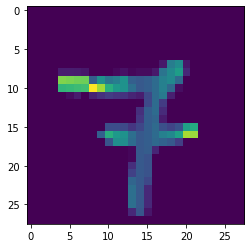

In [ ]:
plt.imshow(x_test[75])